In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ppxf_functions_Z import (
    load_spectrum,
    process_spectrum,
    rebin_to_log,
    make_noise,
    calculate_velscale_fwhm,
    run_ppxf,
    plot_ppxf,
)

In [2]:
raw = np.load("../calibrated data/SB1_data.npy")       # rename your 2D array
waveem = np.load("../calibrated data/SB1_waveobs.npy")

window_size = 10
step        = 1
scale       = 0.4   # arcsec per pixel
z = 0.017206345

pix_min, pix_max = 150, 250   
results = []
raw_roi = raw[:, pix_min:pix_max]

for start in range(0, raw_roi.shape[1] - window_size + 1, step):
    end = start + window_size
    spectrum = raw_roi[:, start:end].sum(axis=1)

    # Build DataFrame for this spectrum
    df_spec = pd.DataFrame({
        "waveem": waveem,
        "flux":   spectrum
    })

    # Process, rebin, and run pPXF
    df_cut = process_spectrum(df_spec)
    noise = make_noise(df_cut)
    df_rb, lam, flux_rb, ln_w = rebin_to_log(df_cut)
    velscale, fwhm = calculate_velscale_fwhm(ln_w, lam)
    pp = run_ppxf(lam, fwhm, velscale, df_rb, noise, redshift=z)

    # Compute global center index
    center = start + window_size//2 + pix_min
    print(f'PIXEL: {center}')

    # Store center, rebinned DataFrame, and fit result
    results.append((center, df_rb, pp))


Emission lines included in gas templates:
['Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731'
 '[NeIII]3968' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      4825       643
 comp.  1:      4963       252
chi2/DOF: 0.1880; DOF: 1586; degree = 4; mdegree = 10
method = capfit; Jac calls: 9; Func calls: 142; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 7/154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      2.177       1.1    4963   252
Comp:  1             [SII]6716     0.2372       1.1    4963   252
Comp:  1             [SII]6731      2.260       1.1    4963   252
Comp:  1           [NII]6583_d      2.561       1.3    4963   252
-----------------------------------------------------------------
PIXEL: 155
Emission 

Emission lines included in gas templates:
['Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731'
 '[NeIII]3968' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      4740       440
 comp.  1:      5178         1
chi2/DOF: 0.3715; DOF: 1586; degree = 4; mdegree = 10
method = capfit; Jac calls: 8; Func calls: 122; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      0.000      0.82    5178     1
Comp:  1             [SII]6716      0.000      0.82    5178     1
Comp:  1             [SII]6731      0.000      0.82    5178     1
Comp:  1           [NII]6583_d     0.1215       1.0    5178     1
-----------------------------------------------------------------
PIXEL: 164
Emission 

Emission lines included in gas templates:
['Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731'
 '[NeIII]3968' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      4869       476
 comp.  1:      5101       309
chi2/DOF: 0.08909; DOF: 1586; degree = 4; mdegree = 10
method = capfit; Jac calls: 13; Func calls: 200; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 7/154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      0.000       1.2    5101   309
Comp:  1             [SII]6716     0.4399       1.2    5101   309
Comp:  1             [SII]6731     0.7090       1.2    5101   309
Comp:  1           [NII]6583_d      1.436       1.5    5101   309
-----------------------------------------------------------------
PIXEL: 173
Emissio

Emission lines included in gas templates:
['Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731'
 '[NeIII]3968' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      5071       453
 comp.  1:      5306       266
chi2/DOF: 0.05132; DOF: 1586; degree = 4; mdegree = 10
method = capfit; Jac calls: 7; Func calls: 107; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 6/154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      3.877      0.73    5306   266
Comp:  1             [SII]6716      1.473      0.76    5306   266
Comp:  1             [SII]6731     0.4642      0.76    5306   266
Comp:  1           [NII]6583_d      3.595      0.93    5306   266
-----------------------------------------------------------------
PIXEL: 182
Emission

Emission lines included in gas templates:
['Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731'
 '[NeIII]3968' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      5118       325
 comp.  1:      5223       207
chi2/DOF: 0.01683; DOF: 1586; degree = 4; mdegree = 10
method = capfit; Jac calls: 6; Func calls: 92; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 6/154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      18.60       1.0    5223   207
Comp:  1             [SII]6716      3.140       1.0    5223   207
Comp:  1             [SII]6731      2.435       1.0    5223   207
Comp:  1           [NII]6583_d      11.97       1.3    5223   207
-----------------------------------------------------------------
PIXEL: 191
Emission 

Emission lines included in gas templates:
['Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731'
 '[NeIII]3968' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      5037       497
 comp.  1:      5126       193
chi2/DOF: 0.01353; DOF: 1586; degree = 4; mdegree = 10
method = capfit; Jac calls: 5; Func calls: 77; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 6/154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      11.27       1.4    5126   193
Comp:  1             [SII]6716      2.521       1.4    5126   193
Comp:  1             [SII]6731      1.886       1.4    5126   193
Comp:  1           [NII]6583_d      8.212       1.8    5126   193
-----------------------------------------------------------------
PIXEL: 200
Emission 

Emission lines included in gas templates:
['Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731'
 '[NeIII]3968' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      4808       654
 comp.  1:      4378      1000
chi2/DOF: 0.04467; DOF: 1586; degree = 4; mdegree = 10
method = capfit; Jac calls: 12; Func calls: 182; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      0.000       5.2    4378  1000
Comp:  1             [SII]6716      3.346       5.1    4378  1000
Comp:  1             [SII]6731      0.000       5.1    4378  1000
Comp:  1           [NII]6583_d      4.912       5.8    4378  1000
-----------------------------------------------------------------
PIXEL: 209
Emissio

Emission lines included in gas templates:
['Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731'
 '[NeIII]3968' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      4863       504
 comp.  1:      5452       105
chi2/DOF: 0.07332; DOF: 1586; degree = 4; mdegree = 10
method = capfit; Jac calls: 11; Func calls: 172; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 5/154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha     0.6330      0.85    5452   105
Comp:  1             [SII]6716     0.4853      0.85    5452   105
Comp:  1             [SII]6731     0.3232      0.85    5452   105
Comp:  1           [NII]6583_d     0.9184       1.1    5452   105
-----------------------------------------------------------------
PIXEL: 218
Emissio

Emission lines included in gas templates:
['Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731'
 '[NeIII]3968' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      5125       311
 comp.  1:      5105       583
chi2/DOF: 0.1447; DOF: 1586; degree = 4; mdegree = 10
method = capfit; Jac calls: 8; Func calls: 126; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 5/154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      3.898       2.2    5105   583
Comp:  1             [SII]6716      2.345       2.3    5105   583
Comp:  1             [SII]6731      0.000       2.3    5105   583
Comp:  1           [NII]6583_d      3.656       2.6    5105   583
-----------------------------------------------------------------
PIXEL: 227
Emission 

Emission lines included in gas templates:
['Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731'
 '[NeIII]3968' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      4754       376
 comp.  1:      5209       695
chi2/DOF: 0.1970; DOF: 1586; degree = 4; mdegree = 10
method = capfit; Jac calls: 11; Func calls: 175; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      19.60       3.3    5209   695
Comp:  1             [SII]6716      6.604       3.5    5209   695
Comp:  1             [SII]6731      0.000       3.5    5209   695
Comp:  1           [NII]6583_d     0.5518       3.9    5209   695
-----------------------------------------------------------------
PIXEL: 236
Emission

Emission lines included in gas templates:
['Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731'
 '[NeIII]3968' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      5290       130
 comp.  1:      4939       377
chi2/DOF: 0.3885; DOF: 1586; degree = 4; mdegree = 10
method = capfit; Jac calls: 10; Func calls: 155; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 6/154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      3.885       1.6    4939   377
Comp:  1             [SII]6716      2.026       1.8    4939   377
Comp:  1             [SII]6731      2.007       1.8    4939   377
Comp:  1           [NII]6583_d      1.118       2.1    4939   377
-----------------------------------------------------------------
PIXEL: 245


Peak flux at 190 px


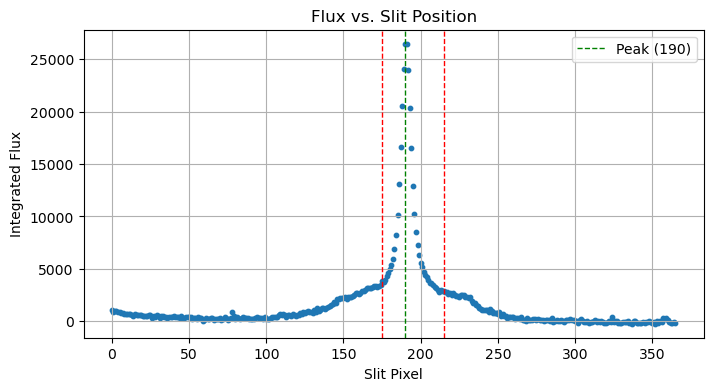

In [3]:
# raw.shape == (n_wave, n_spatial)
spatial_flux = raw.sum(axis=0)       # total flux in each slit column
slit_pixels  = np.arange(raw.shape[1])

# Only look between 150 and 250
search_range = slice(150, 251)
peak_rel = np.argmax(spatial_flux[search_range])
peak = slit_pixels[search_range][peak_rel]

print(f"Peak flux at {peak} px")

plt.figure(figsize=(8, 4))
plt.axvline(peak, color='green', linestyle='--', linewidth=1,
            label=f'Peak ({peak})')
plt.axvline(175, color='red', linestyle='--', linewidth=1)
plt.axvline(215, color='red', linestyle='--', linewidth=1)
plt.scatter(slit_pixels, spatial_flux, s=10)
plt.xlabel("Slit Pixel")
plt.ylabel("Integrated Flux")
plt.title("Flux vs. Slit Position")
plt.grid(True)
plt.legend()
plt.show()


Window centre: 180


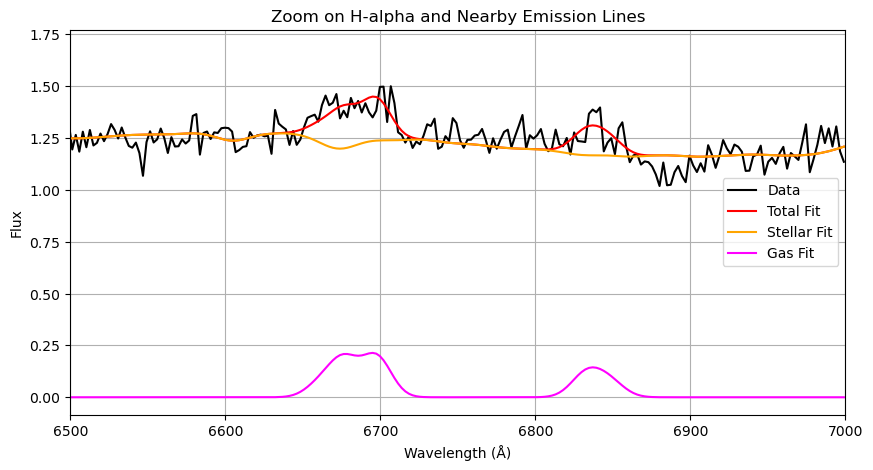

σ (km/s): 405.82

Window centre: 181


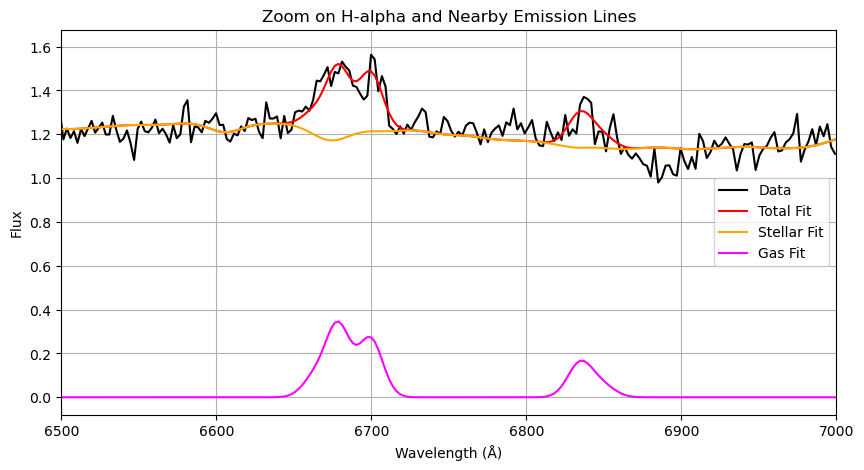

σ (km/s): 330.11

Window centre: 182


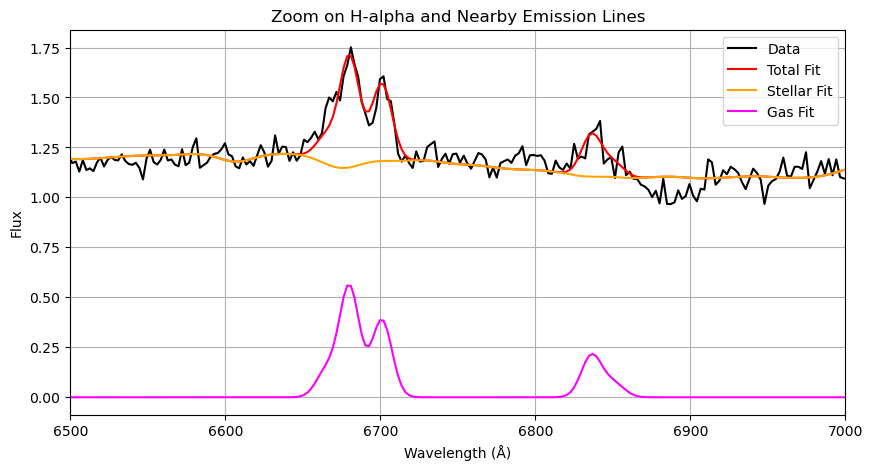

σ (km/s): 266.07

Window centre: 183


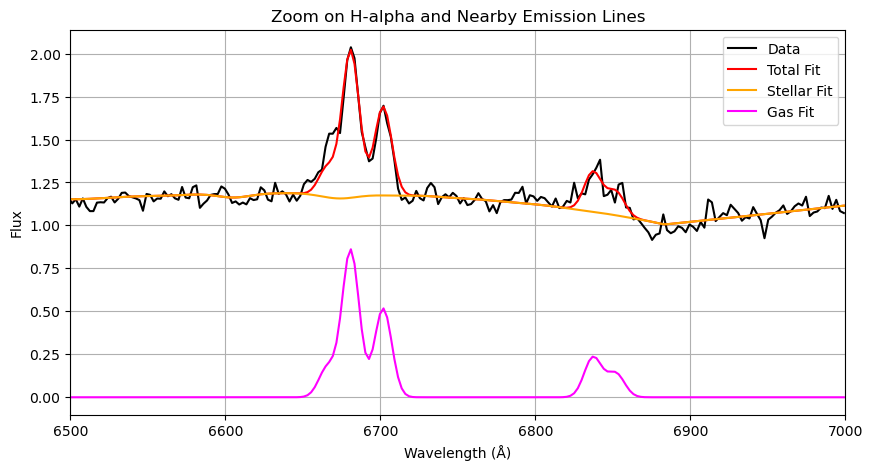

σ (km/s): 218.35

Window centre: 184


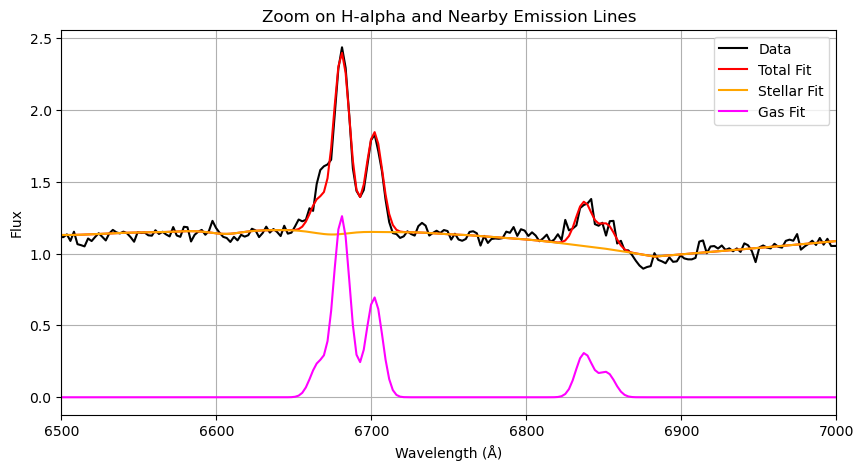

σ (km/s): 200.19

Window centre: 185


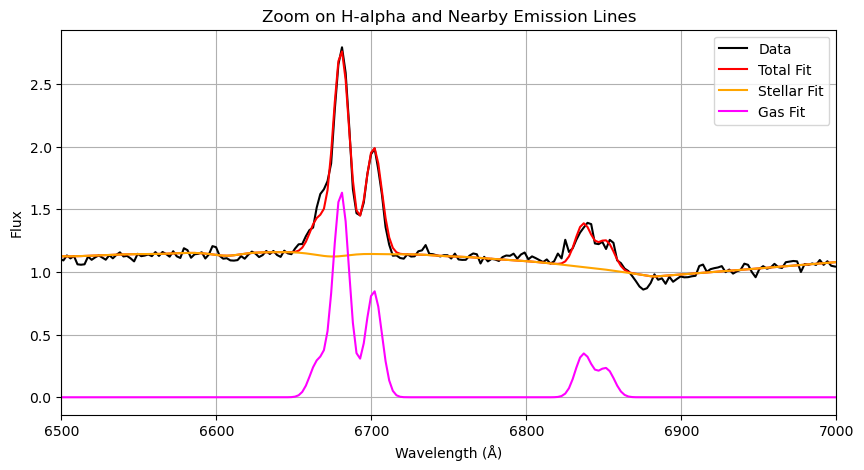

σ (km/s): 199.27

Window centre: 186


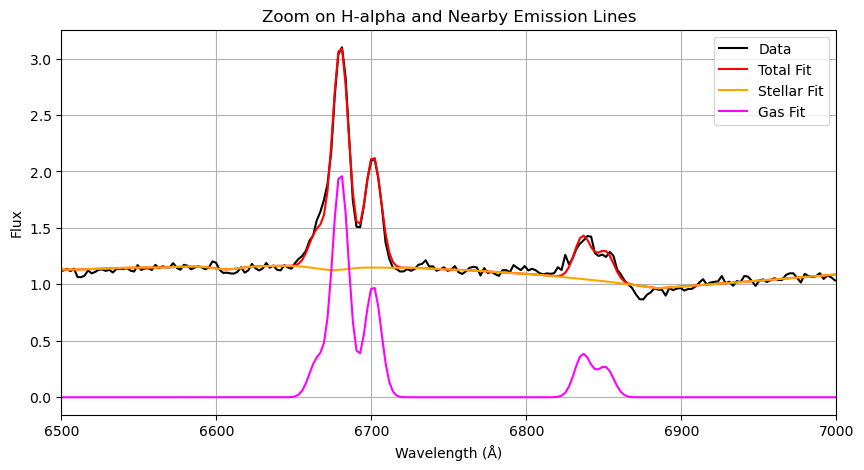

σ (km/s): 202.39

Window centre: 187


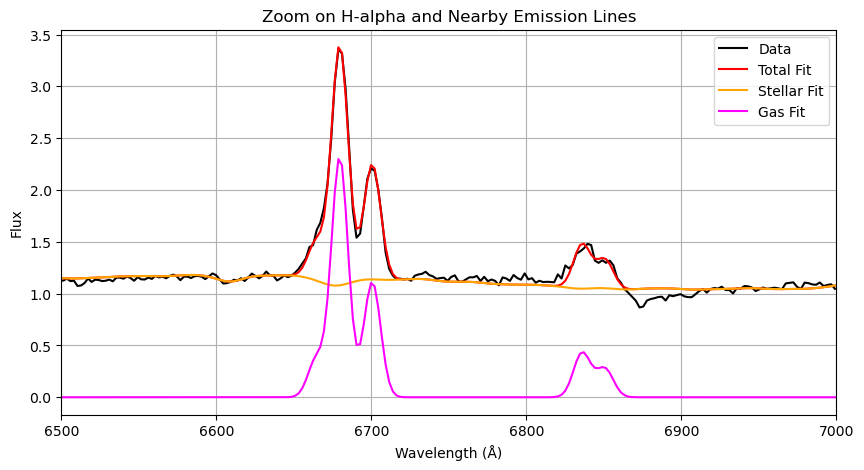

σ (km/s): 210.79

Window centre: 188


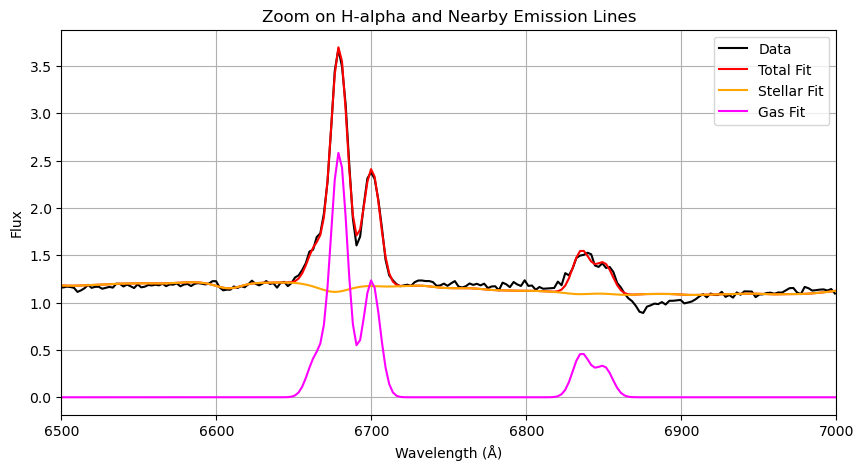

σ (km/s): 211.87

Window centre: 189


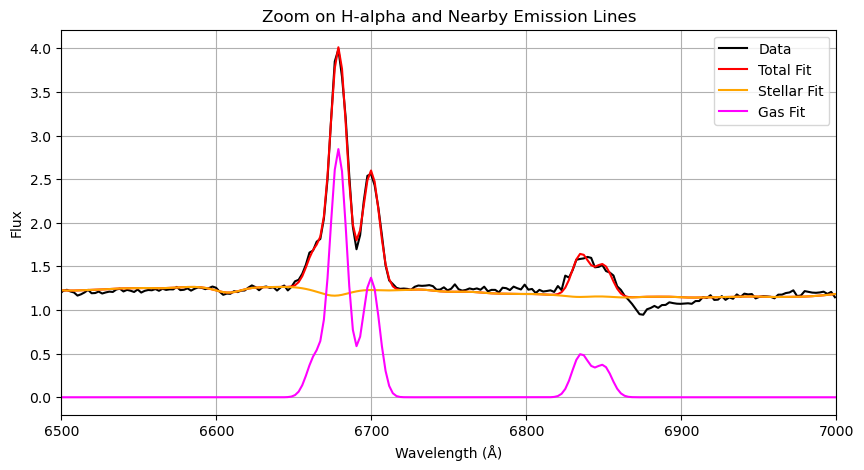

σ (km/s): 210.40

Window centre: 190


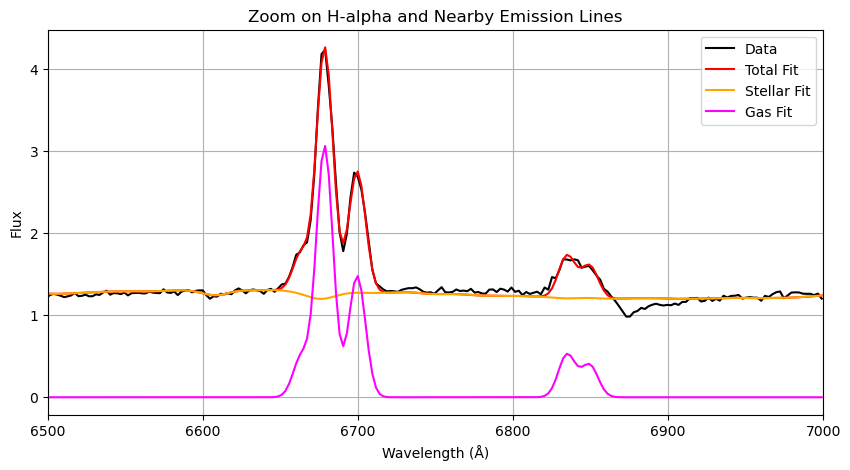

σ (km/s): 209.18

Window centre: 191


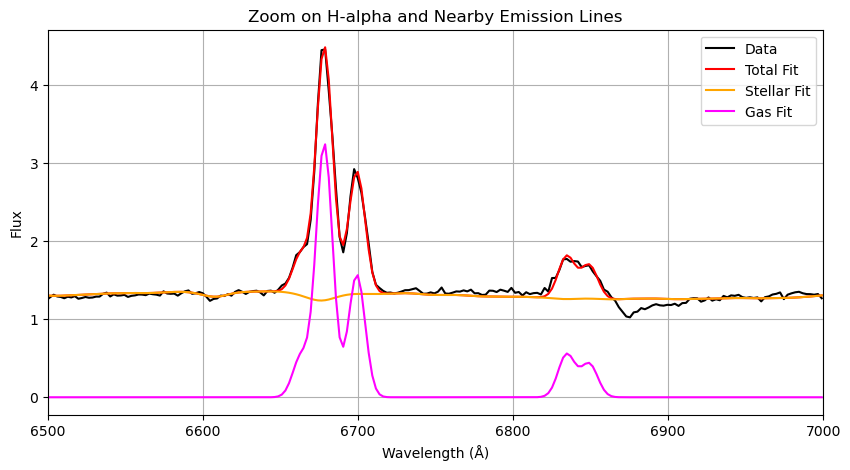

σ (km/s): 207.11

Window centre: 192


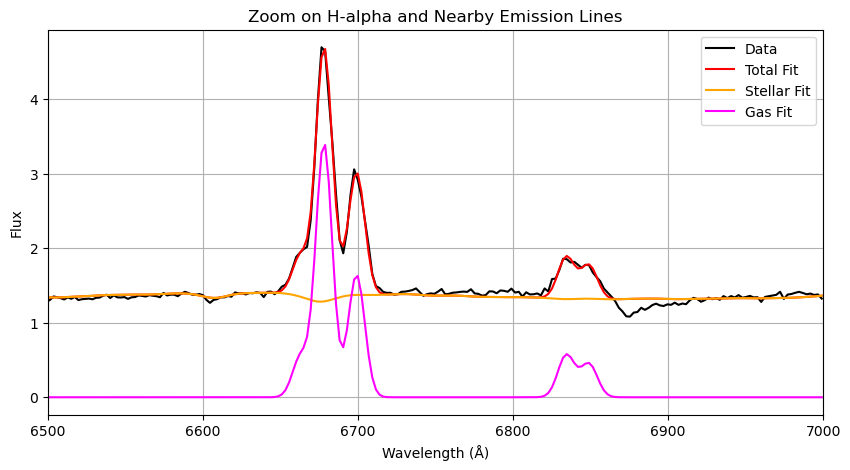

σ (km/s): 205.69

Window centre: 193


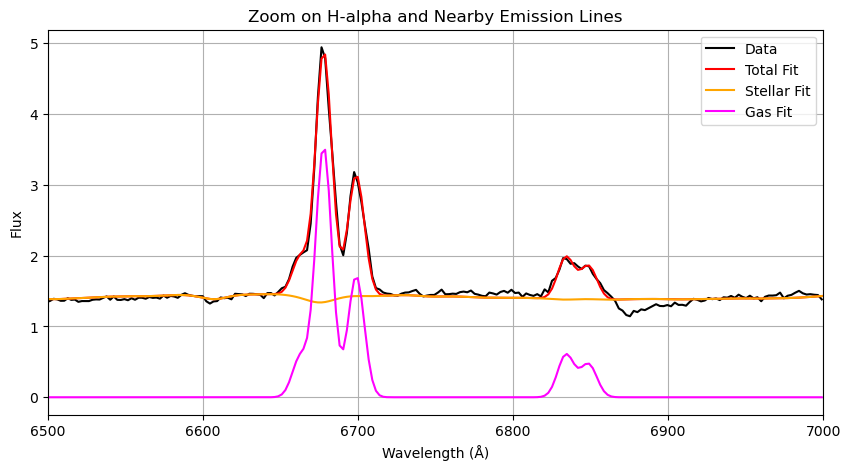

σ (km/s): 202.01

Window centre: 194


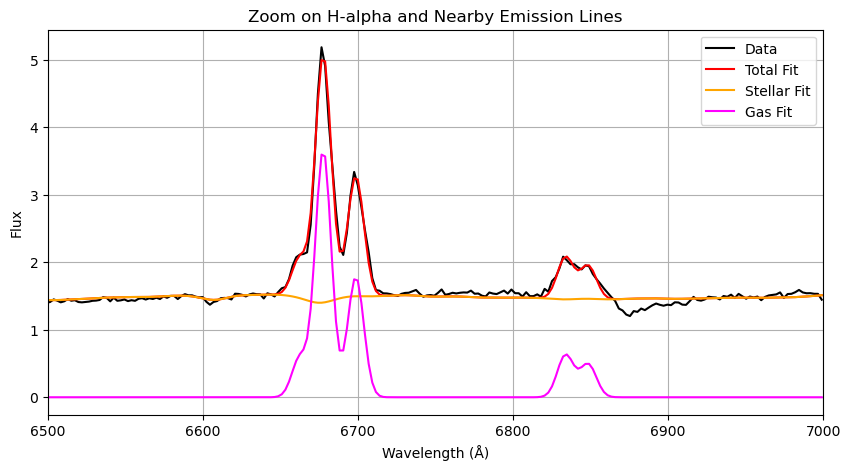

σ (km/s): 198.63

Window centre: 195


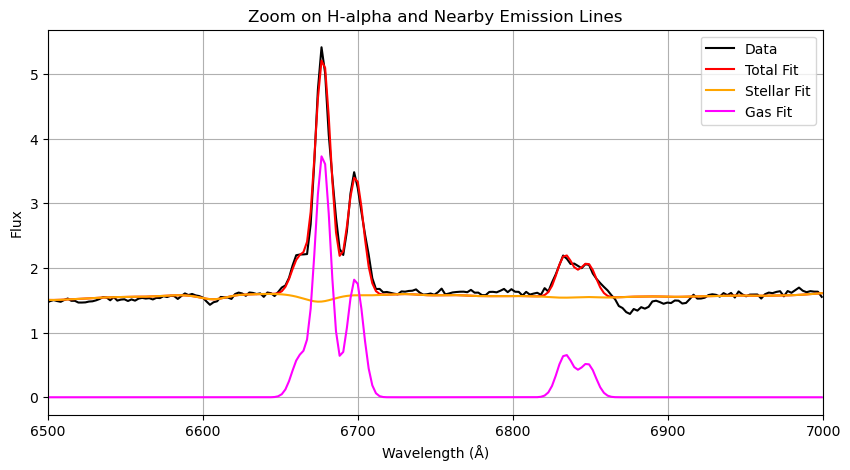

σ (km/s): 193.97

Window centre: 196


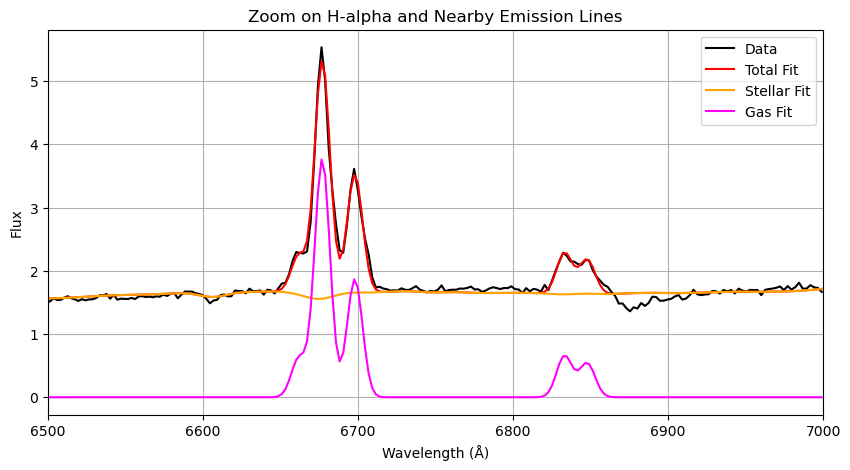

σ (km/s): 187.58

Window centre: 197


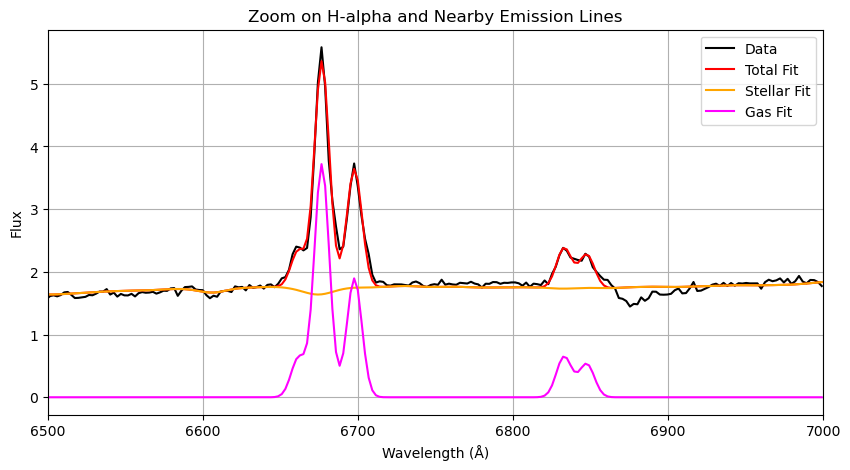

σ (km/s): 180.97

Window centre: 198


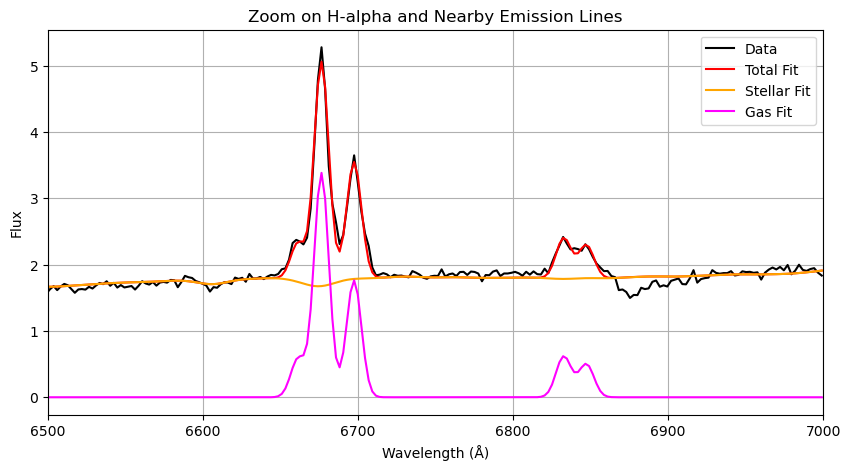

σ (km/s): 179.12

Window centre: 199


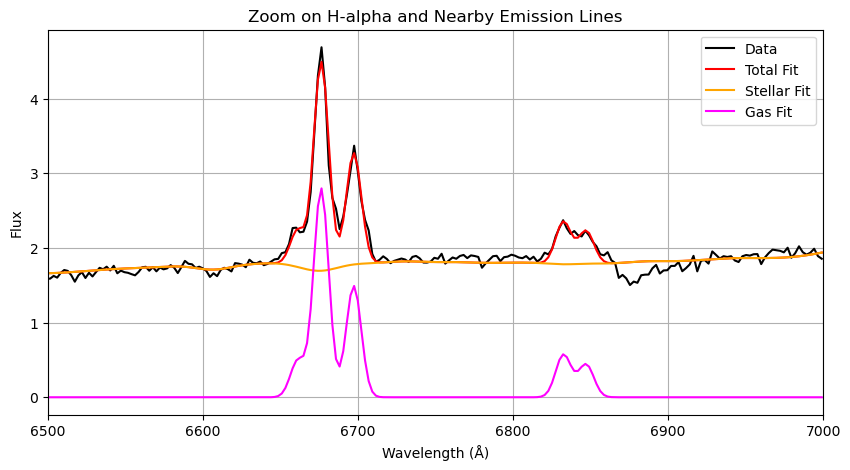

σ (km/s): 183.42

Window centre: 200


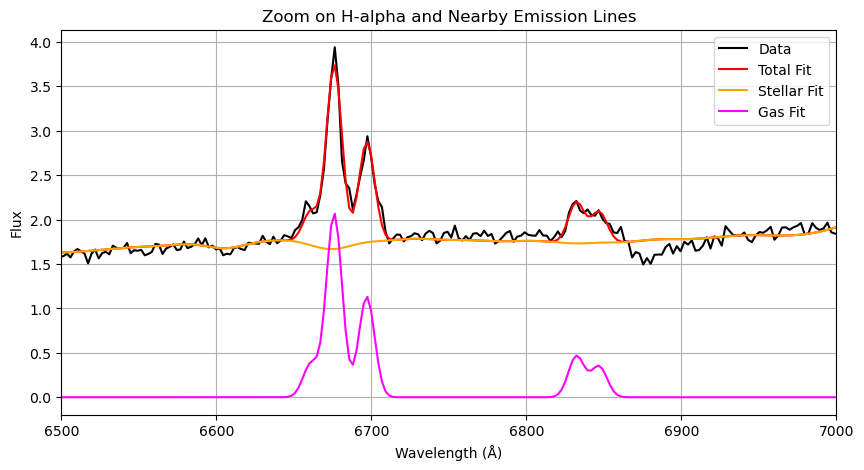

σ (km/s): 193.38

Window centre: 201


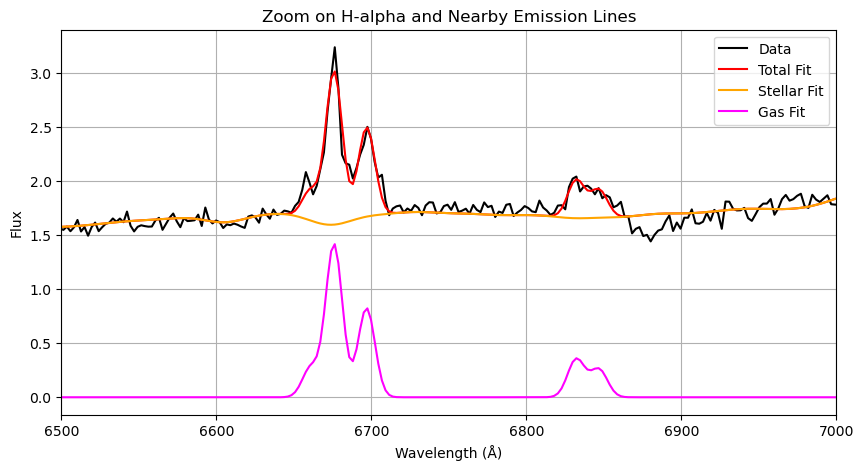

σ (km/s): 210.98

Window centre: 202


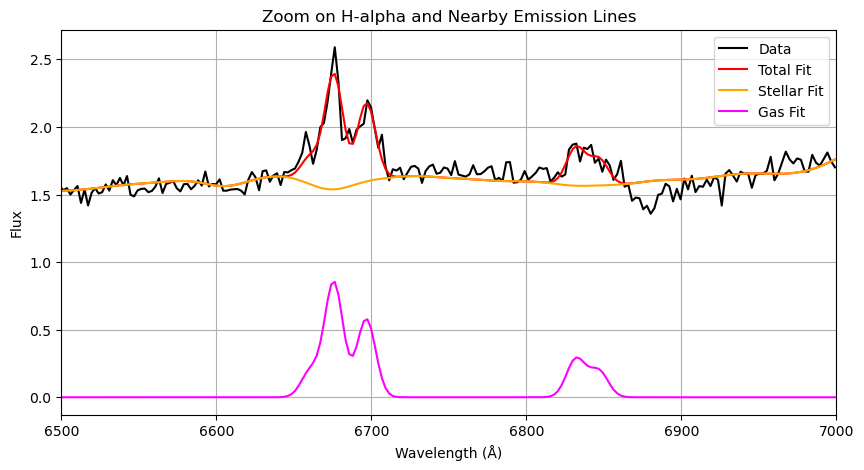

σ (km/s): 239.94

Window centre: 203


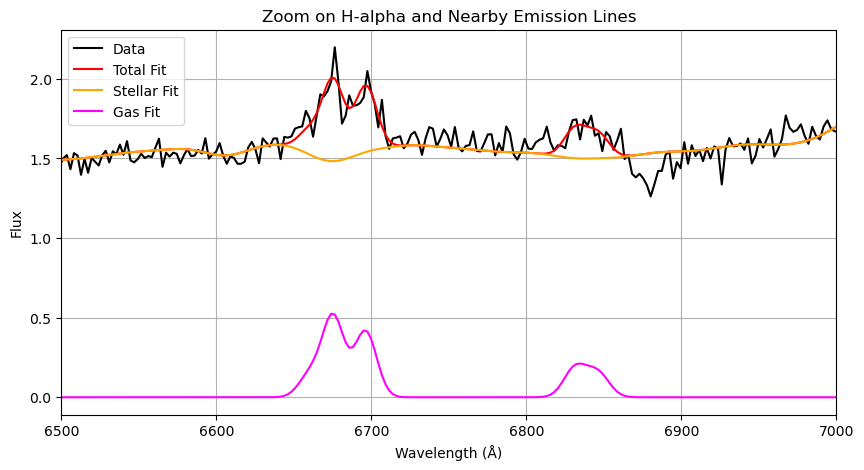

σ (km/s): 295.27

Window centre: 204


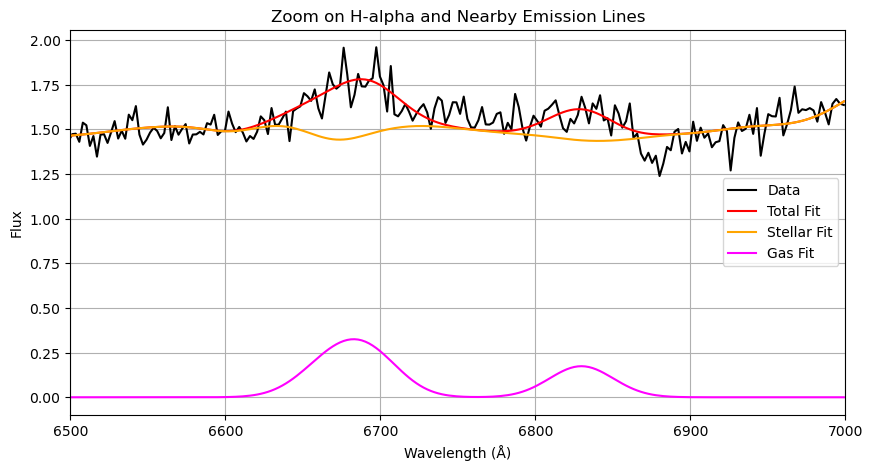

σ (km/s): 894.72

Window centre: 205


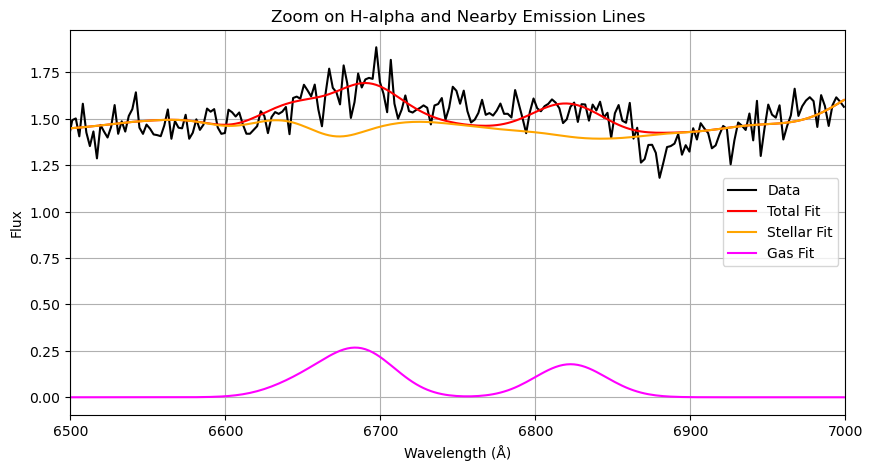

σ (km/s): 1000.00

Window centre: 206


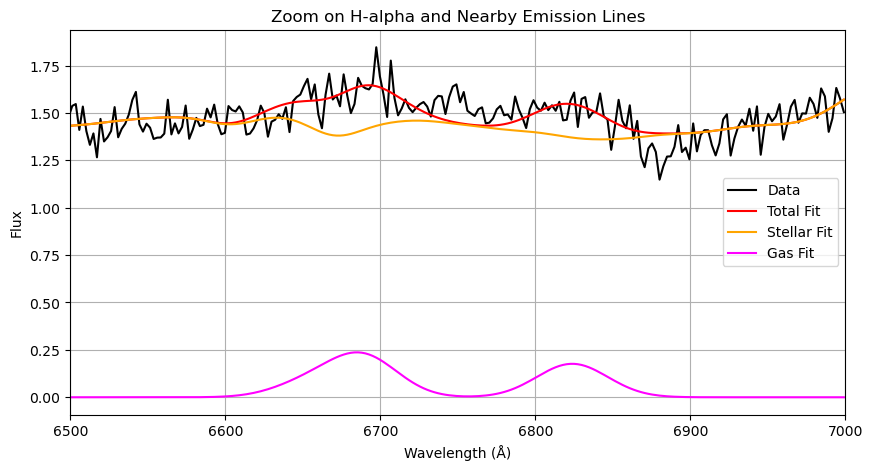

σ (km/s): 1000.00

Window centre: 207


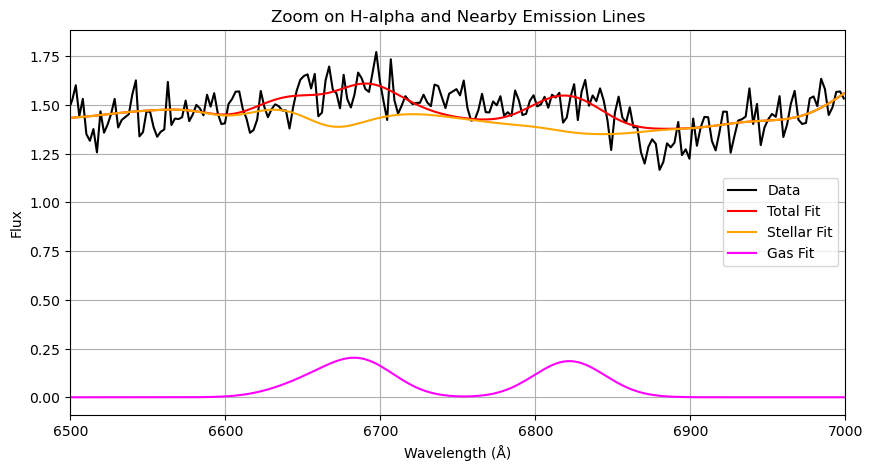

σ (km/s): 1000.00

Window centre: 208


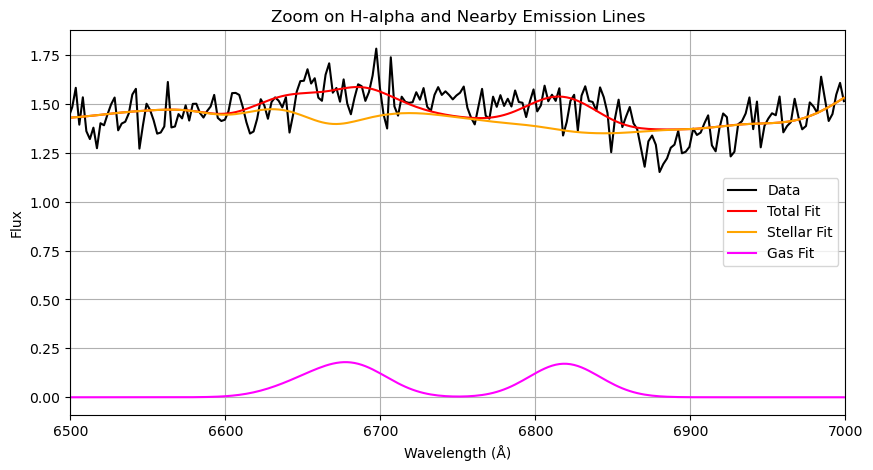

σ (km/s): 1000.00

Window centre: 209


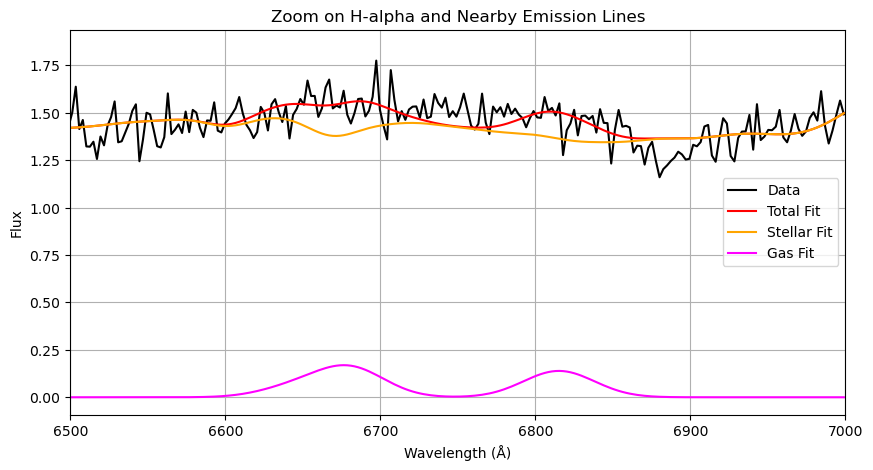

σ (km/s): 1000.00

Window centre: 210


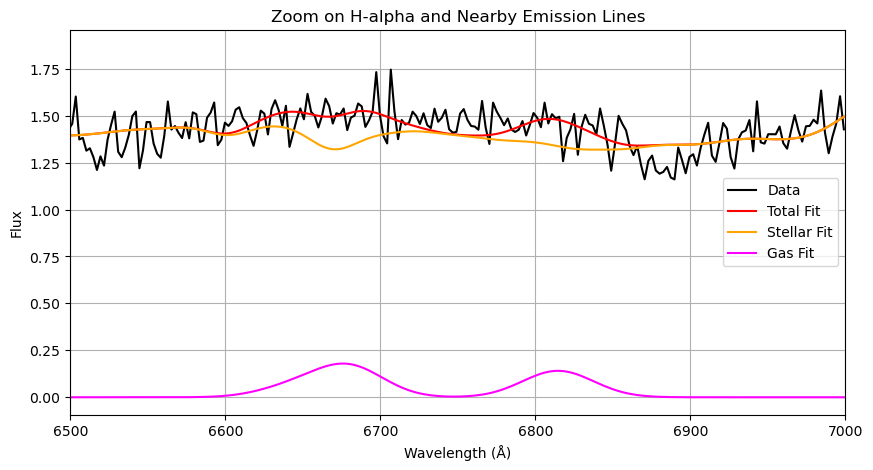

σ (km/s): 1000.00

Window centre: 211


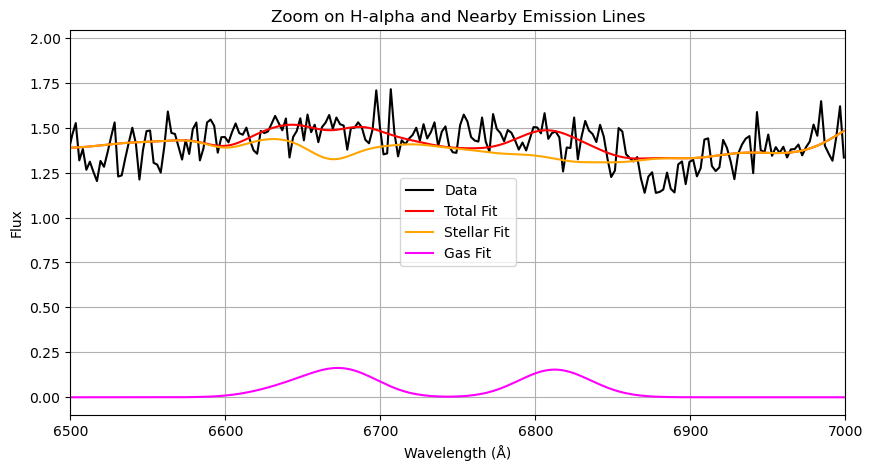

σ (km/s): 1000.00

Window centre: 212


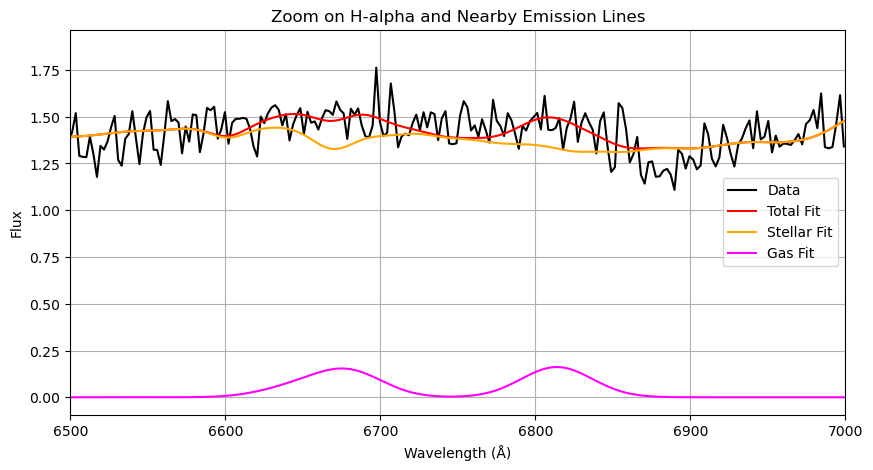

σ (km/s): 1000.00

Window centre: 213


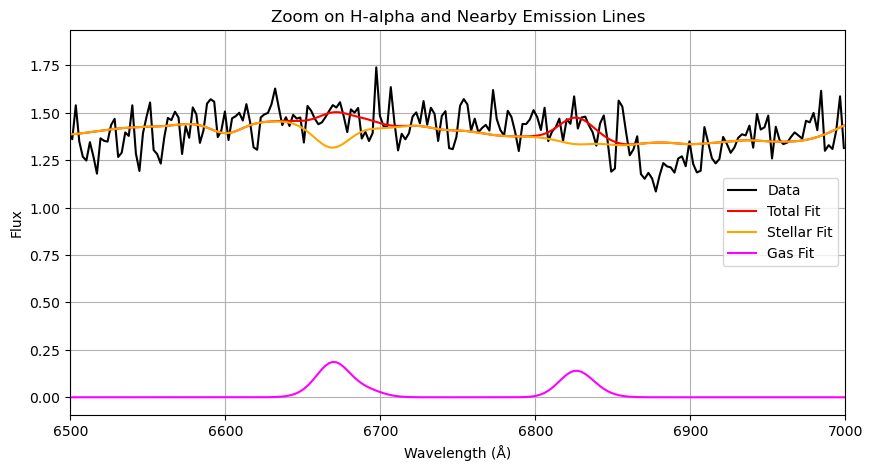

σ (km/s): 451.10

Window centre: 214


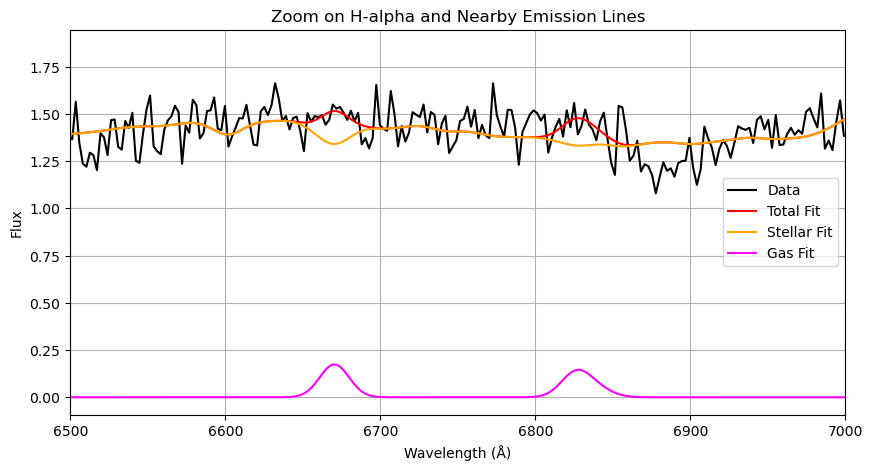

σ (km/s): 407.58

Window centre: 215


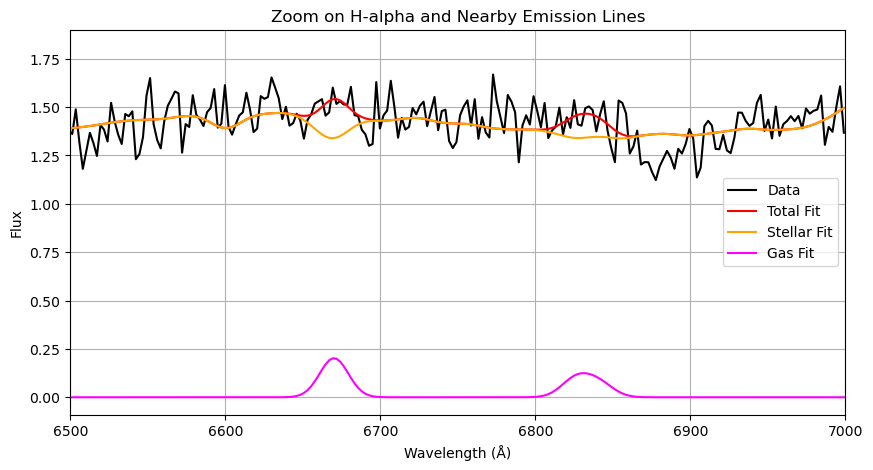

σ (km/s): 397.44

Window centre: 216


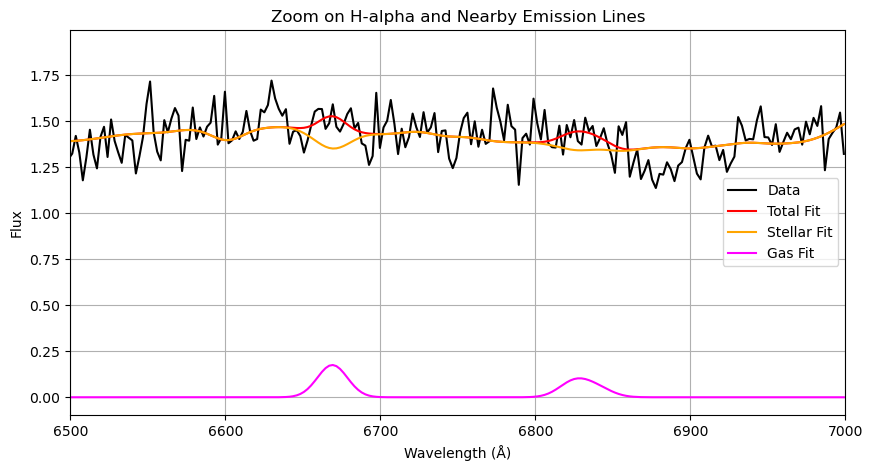

σ (km/s): 418.58

Window centre: 217


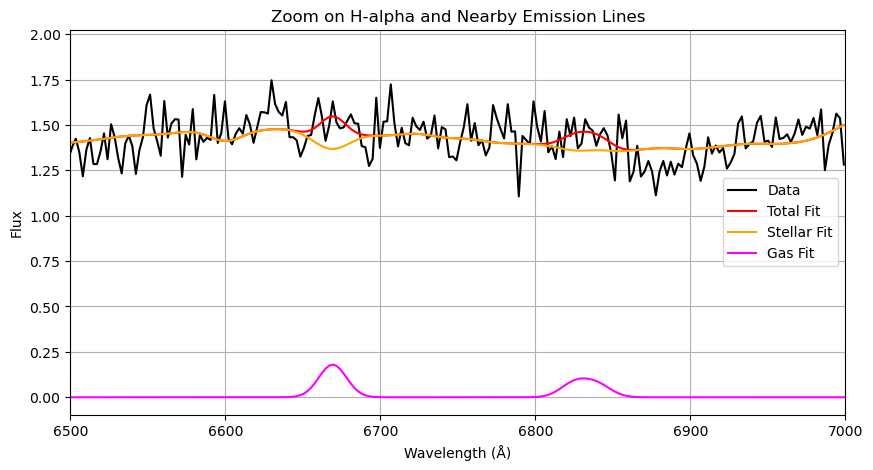

σ (km/s): 381.11

Window centre: 218


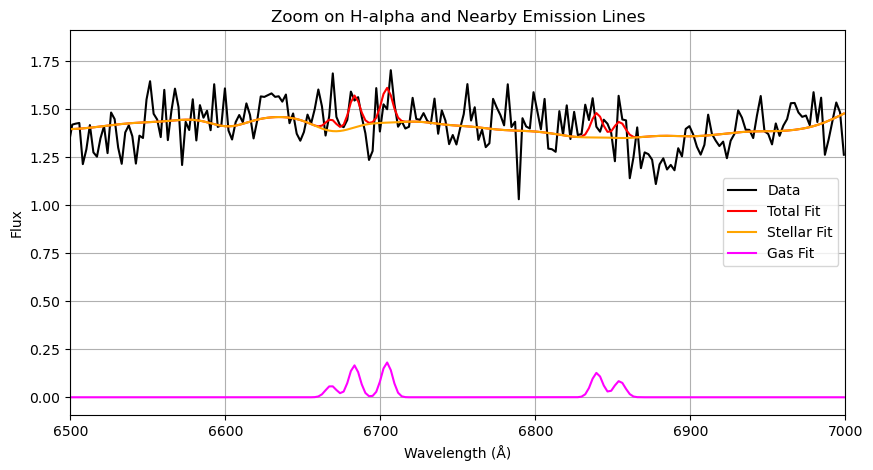

σ (km/s): 104.54

Window centre: 219


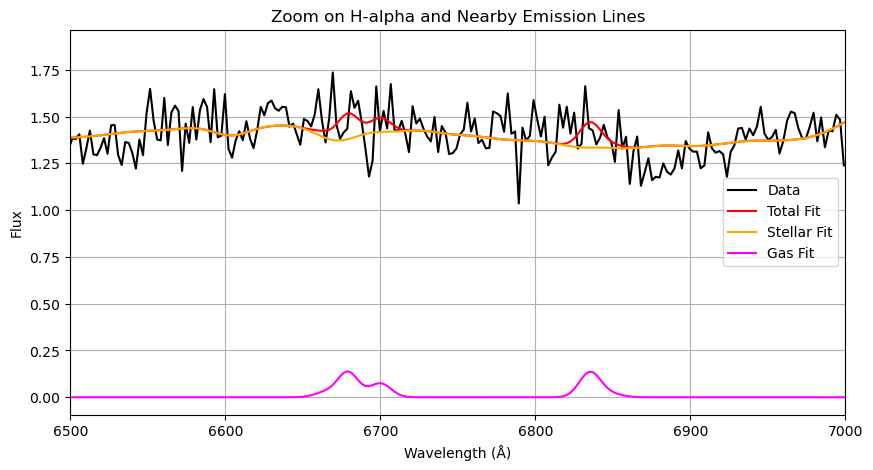

σ (km/s): 277.45

Window centre: 220


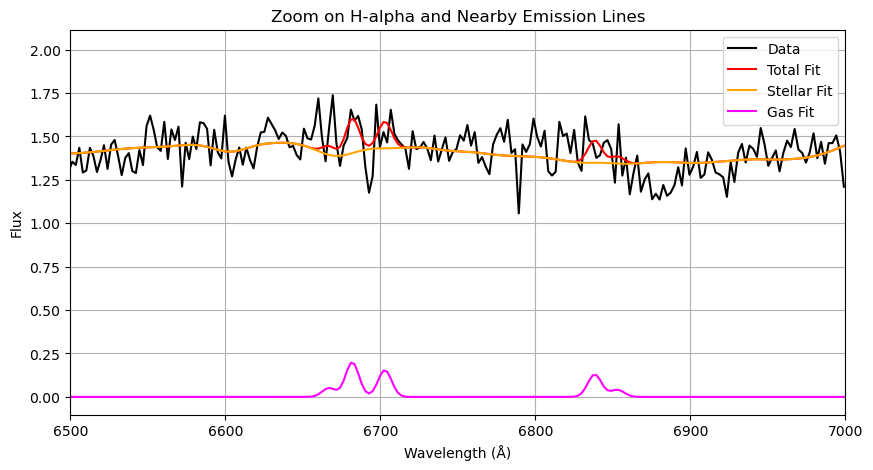

σ (km/s): 154.02

Window centre: 221


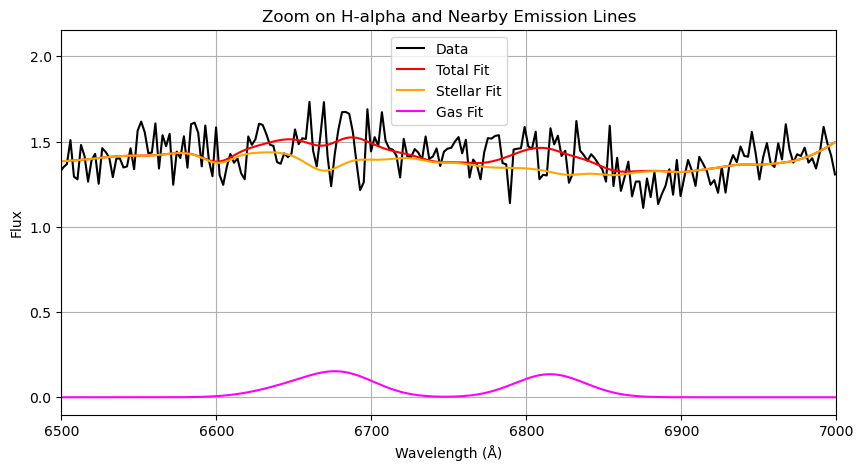

σ (km/s): 1000.00

Window centre: 222


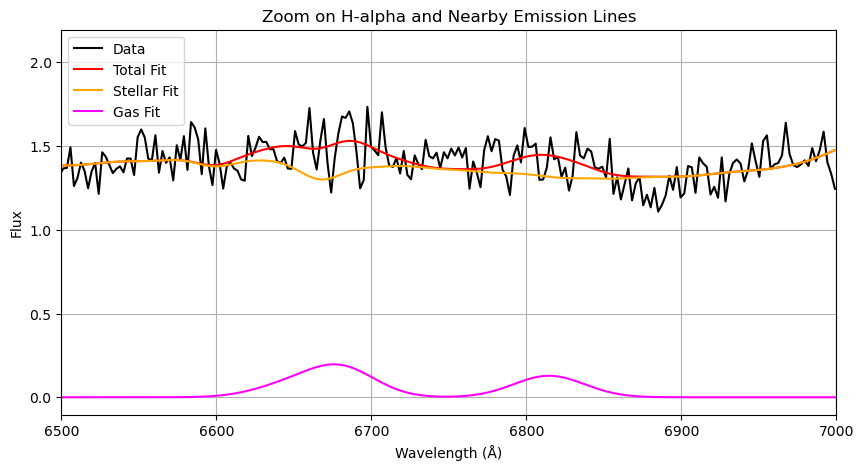

σ (km/s): 1000.00

Window centre: 223


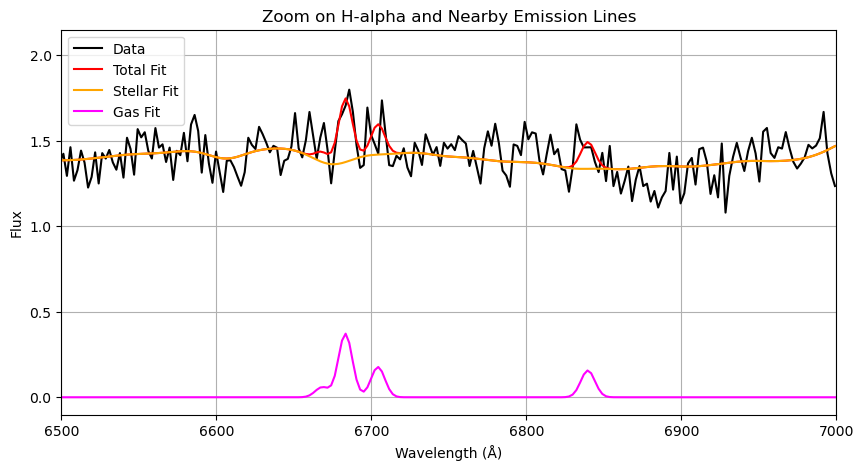

σ (km/s): 160.03

Window centre: 224


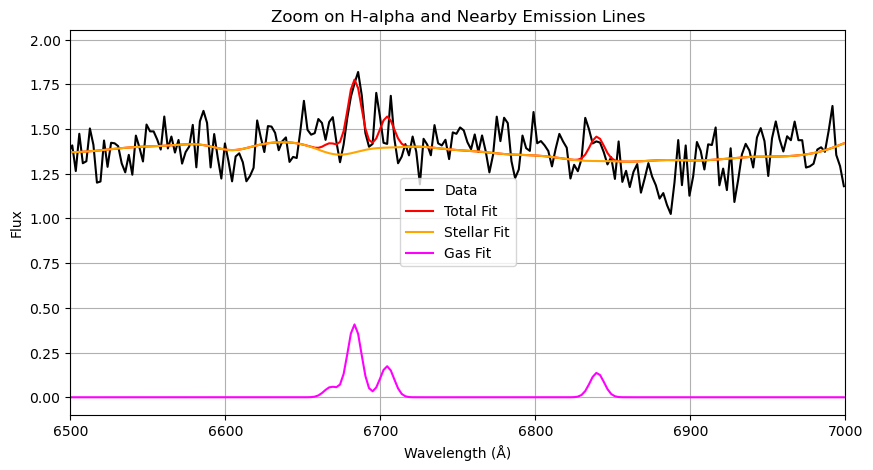

σ (km/s): 160.27

Window centre: 225


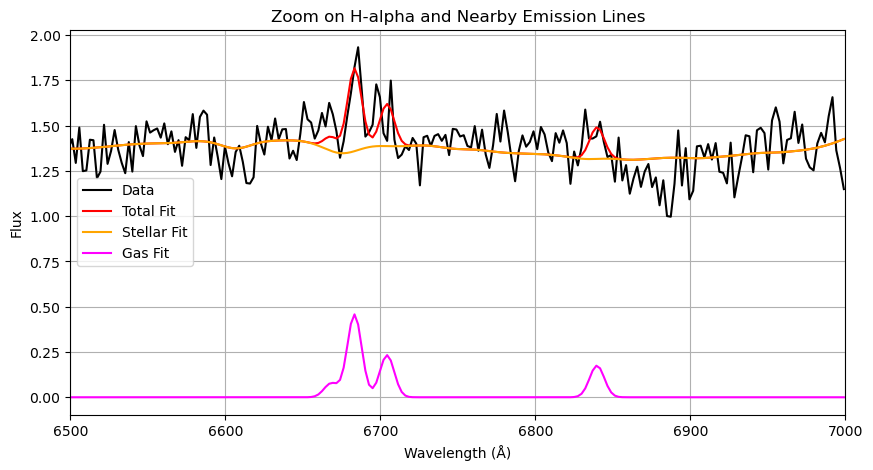

σ (km/s): 169.33

Window centre: 226


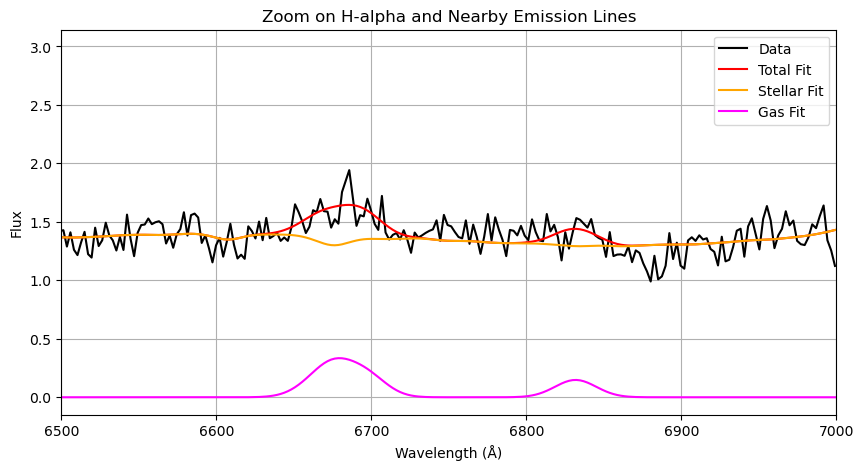

σ (km/s): 571.06

Window centre: 227


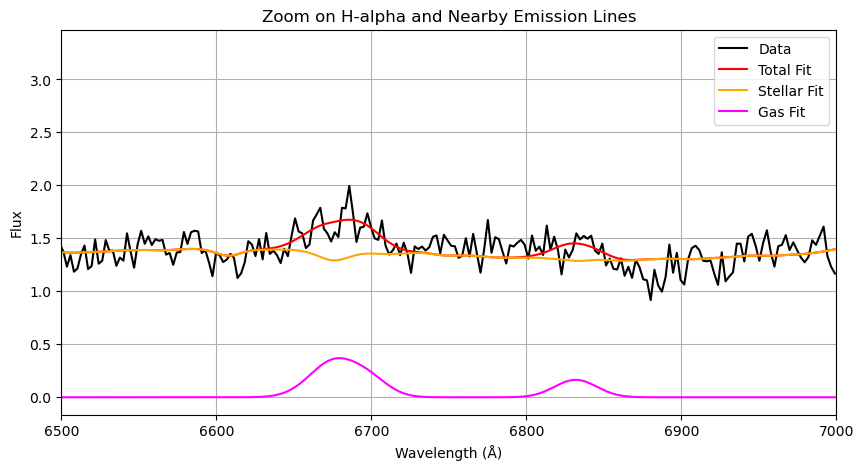

σ (km/s): 582.86

Window centre: 228


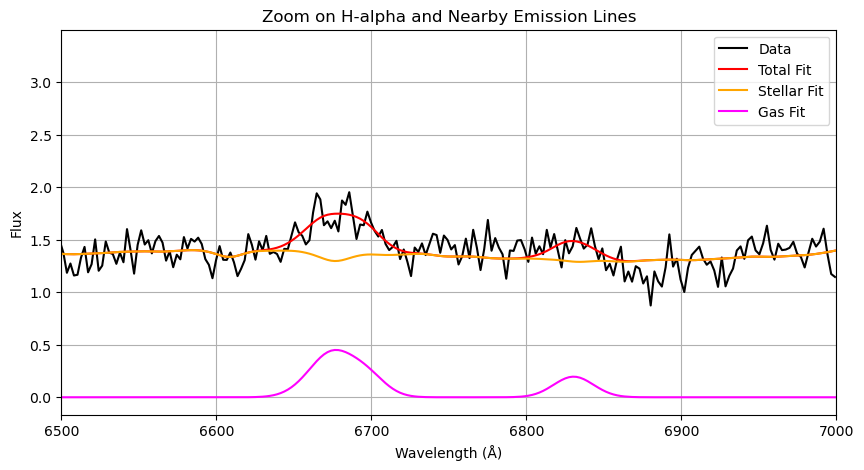

σ (km/s): 552.11

Window centre: 229


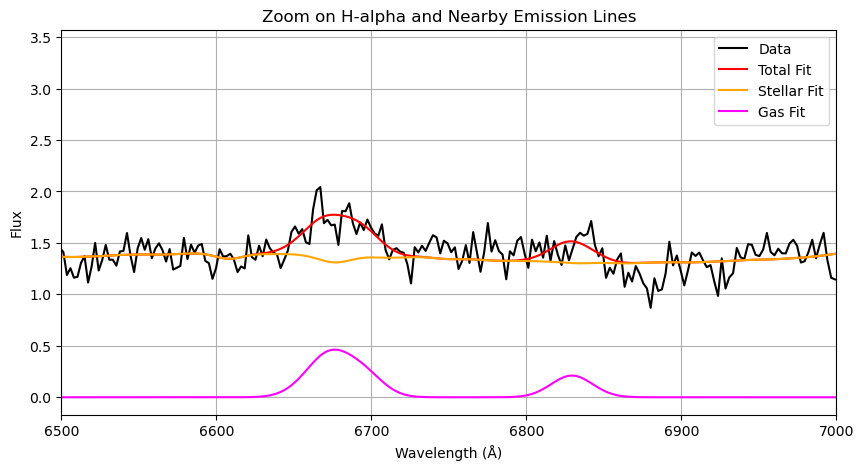

σ (km/s): 571.29

Window centre: 230


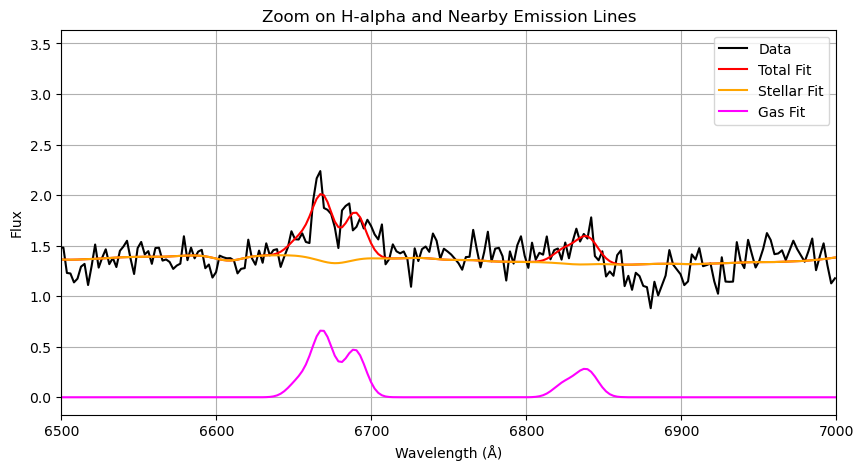

σ (km/s): 286.48

Window centre: 231


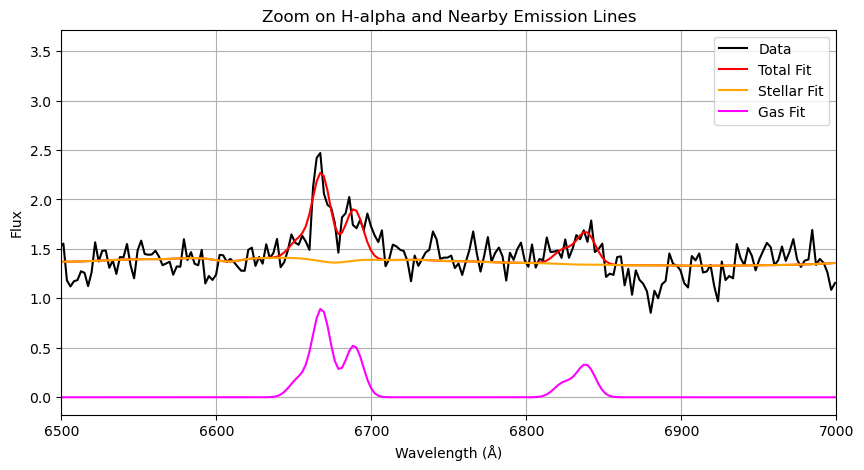

σ (km/s): 237.33

Window centre: 232


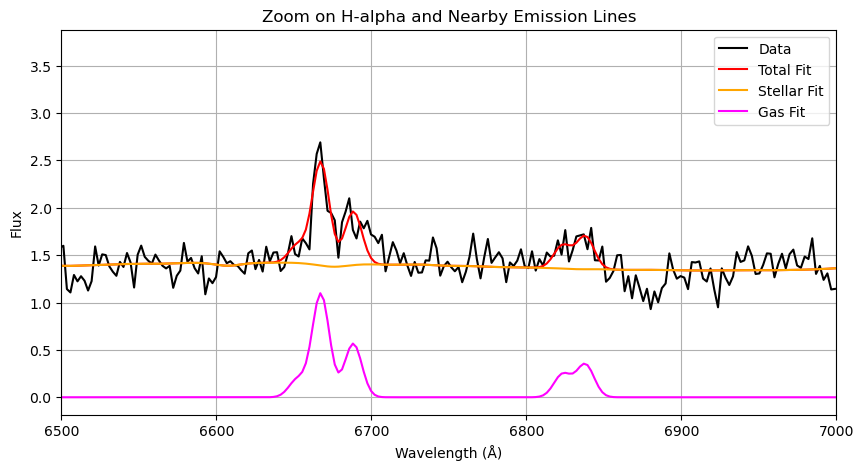

σ (km/s): 218.13

Window centre: 233


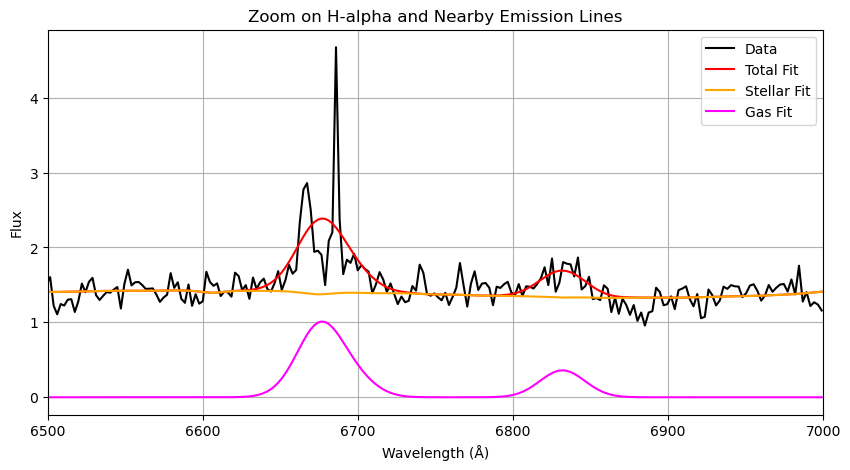

σ (km/s): 623.50

Window centre: 234


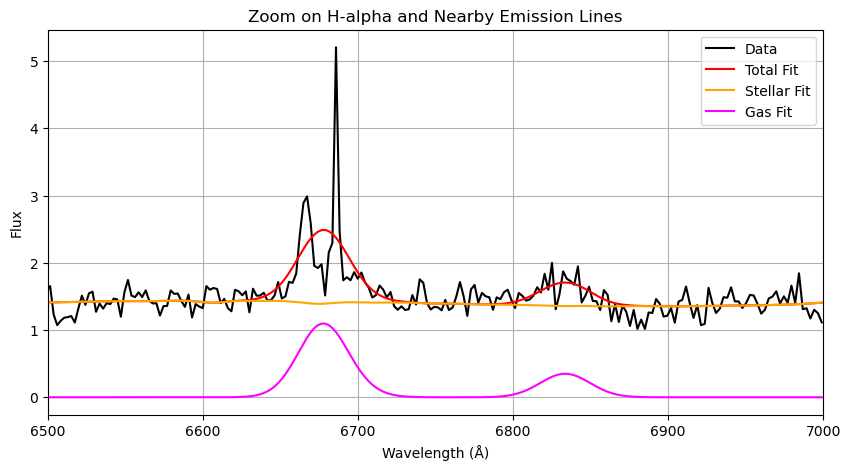

σ (km/s): 696.42

Window centre: 235


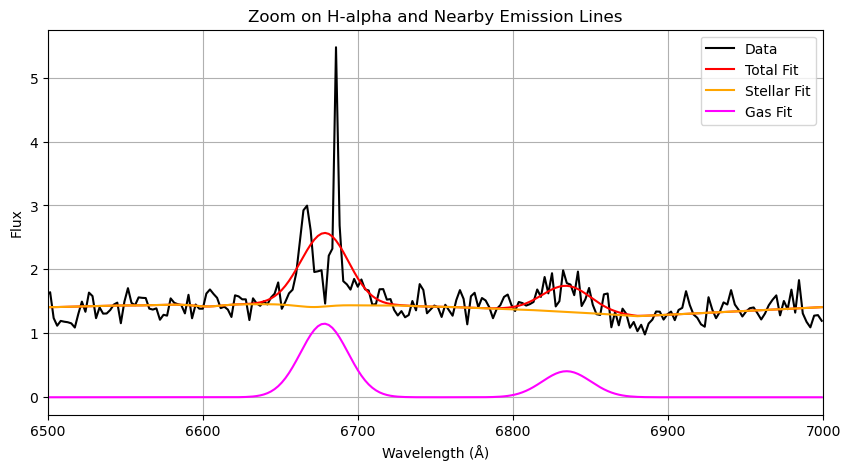

σ (km/s): 676.06

Window centre: 236


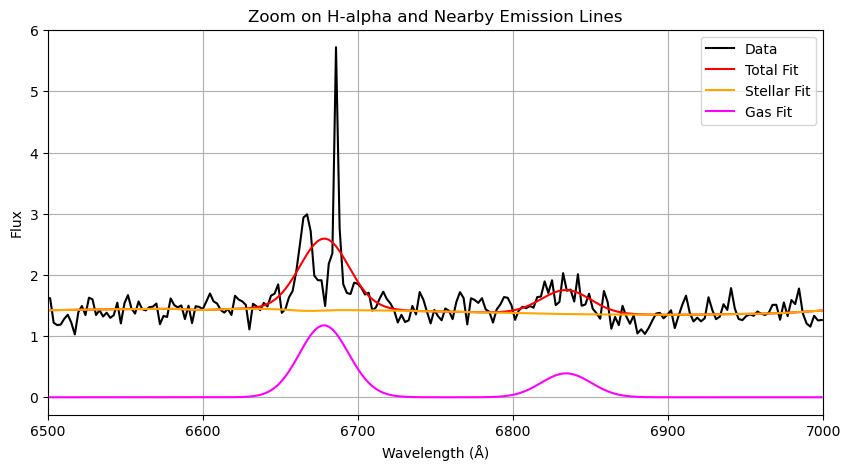

σ (km/s): 695.25

Window centre: 237


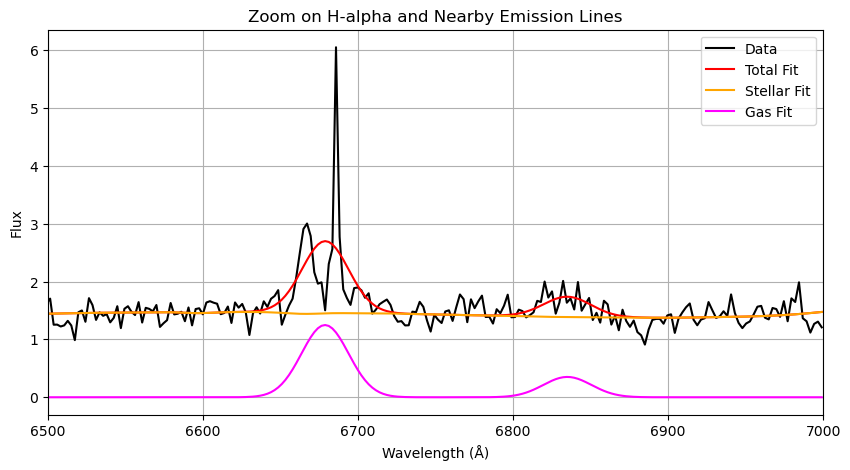

σ (km/s): 670.01

Window centre: 238


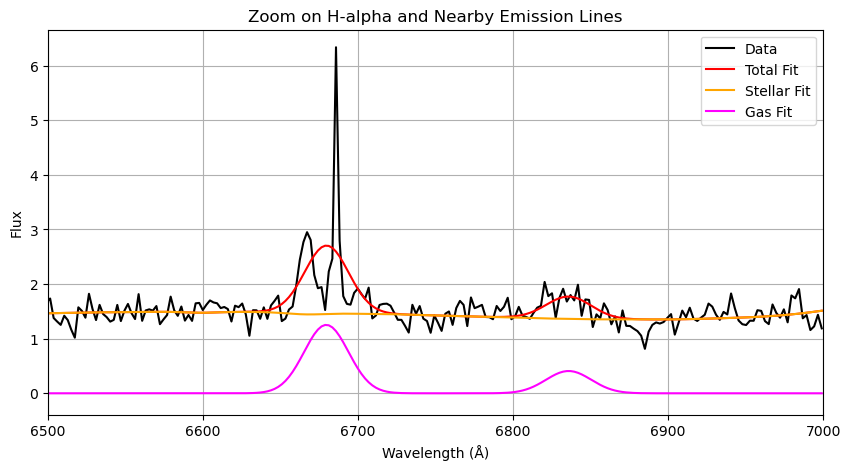

σ (km/s): 629.46

Window centre: 239


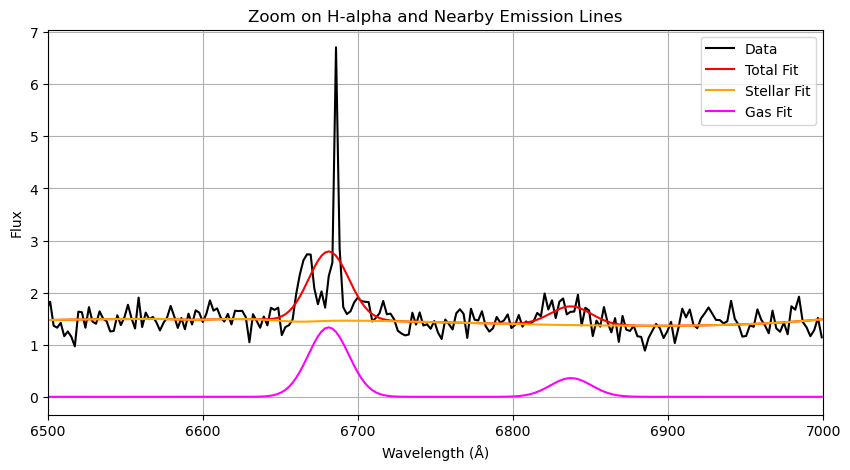

σ (km/s): 571.09

Window centre: 240


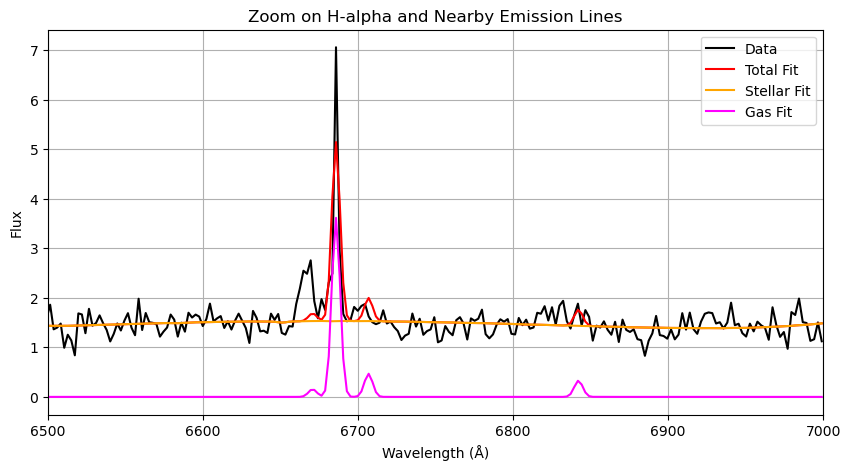

σ (km/s): 1.05

Window centre: 241


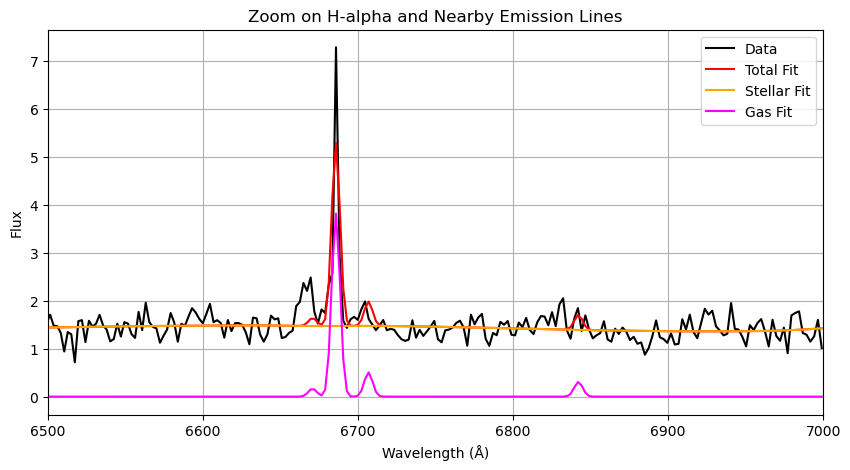

σ (km/s): 1.05

Window centre: 242


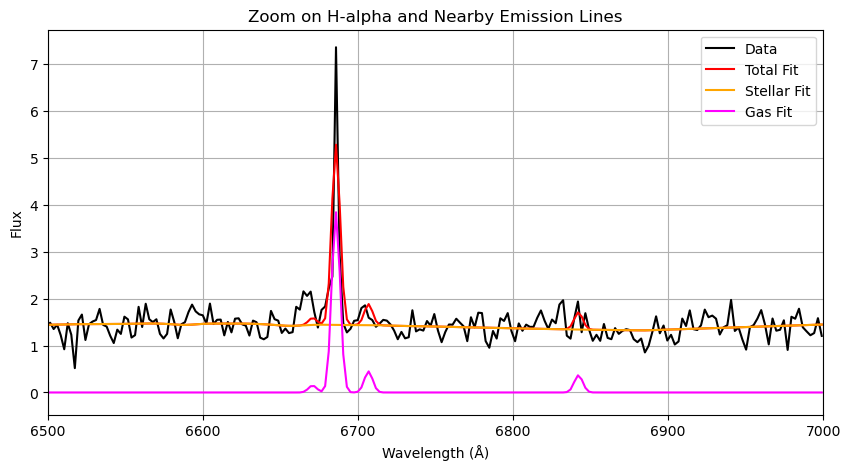

σ (km/s): 1.05

Window centre: 243


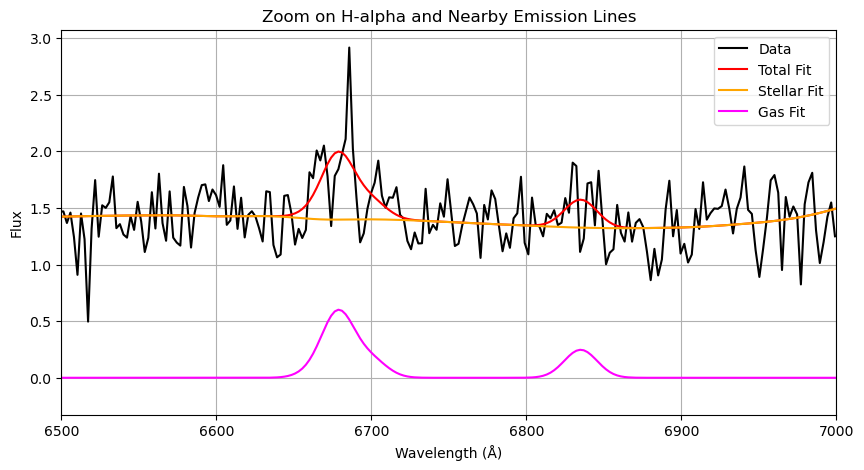

σ (km/s): 447.35

Window centre: 244


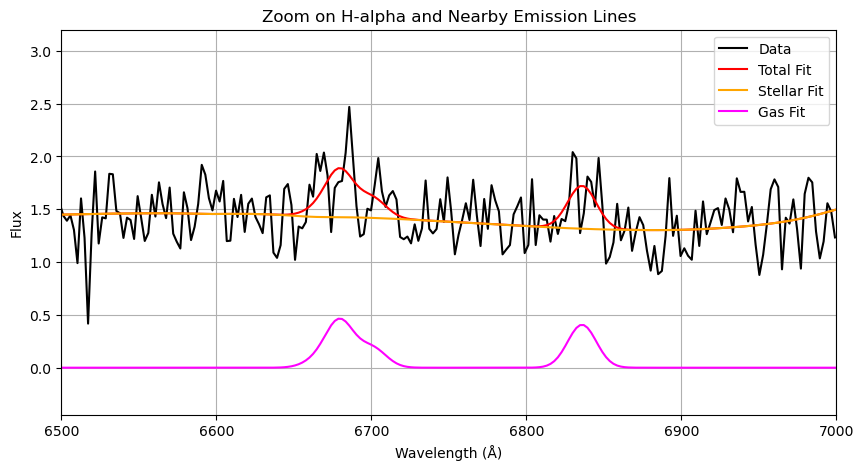

σ (km/s): 387.42

Window centre: 245


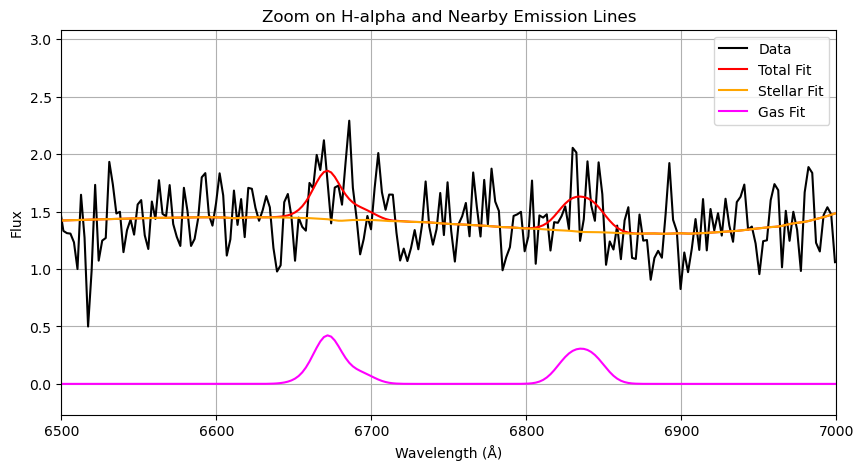

σ (km/s): 376.96



In [4]:
for center, df_rb, pp in results[25:100]:
    # Ensure the function can access 'lam'
    lam_array = df_rb['lam'].values
    plot_ppxf.__globals__['lam'] = lam_array

    print(f"Window centre: {center}")
    plot_ppxf(df_rb, pp)

    # Extract and print the Hα sigma (km/s)
    sigma = pp.sol[1][1]
    print(f"σ (km/s): {sigma:.2f}\n")

In [5]:
centers     = []
velocities  = []; v_errs     = []
dispersions = []; sigma_errs = []
EWs         = []; EW_errs    = []

for center, _, pp in results:
    # --- extract Hα kinematics from the list ---
    sol_gas    = pp.sol[1]
    err_gas    = pp.error[1]
    v_ha, sigma_ha       = sol_gas
    #sigma = np.sqrt(sigma_inst**2 + sigma_ha**2)

    v_ha_err, sigma_ha_err = err_gas

    # find Hα in gas_names (should be idx 0 here)
    idx = np.where(pp.gas_names == "Halpha")[0][0]

    # compute flux, continuum & EW as before
    flux_ha   = pp.gas_flux[idx]
    continuum = pp.bestfit - pp.gas_bestfit
    peak_i    = np.argmax(pp.gas_bestfit_templates[:, idx])
    cont0     = continuum[peak_i]
    cont_err  = pp.noise[peak_i]
    flux_err  = pp.gas_flux_error[idx]

    EW        = flux_ha / cont0
    EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)

    # store
    centers.append(center)
    velocities.append(v_ha)
    v_errs.append(v_ha_err)
    dispersions.append(sigma_ha)
    sigma_errs.append(sigma_ha_err)
    EWs.append(EW)
    EW_errs.append(EW_err)


/var/folders/r3/l94405xd0mq2s62v2swzjq2m0000gn/T/ipykernel_42753/3518839896.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)
/var/folders/r3/l94405xd0mq2s62v2swzjq2m0000gn/T/ipykernel_42753/3518839896.py:27: RuntimeWarning: invalid value encountered in scalar multiply
  EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)


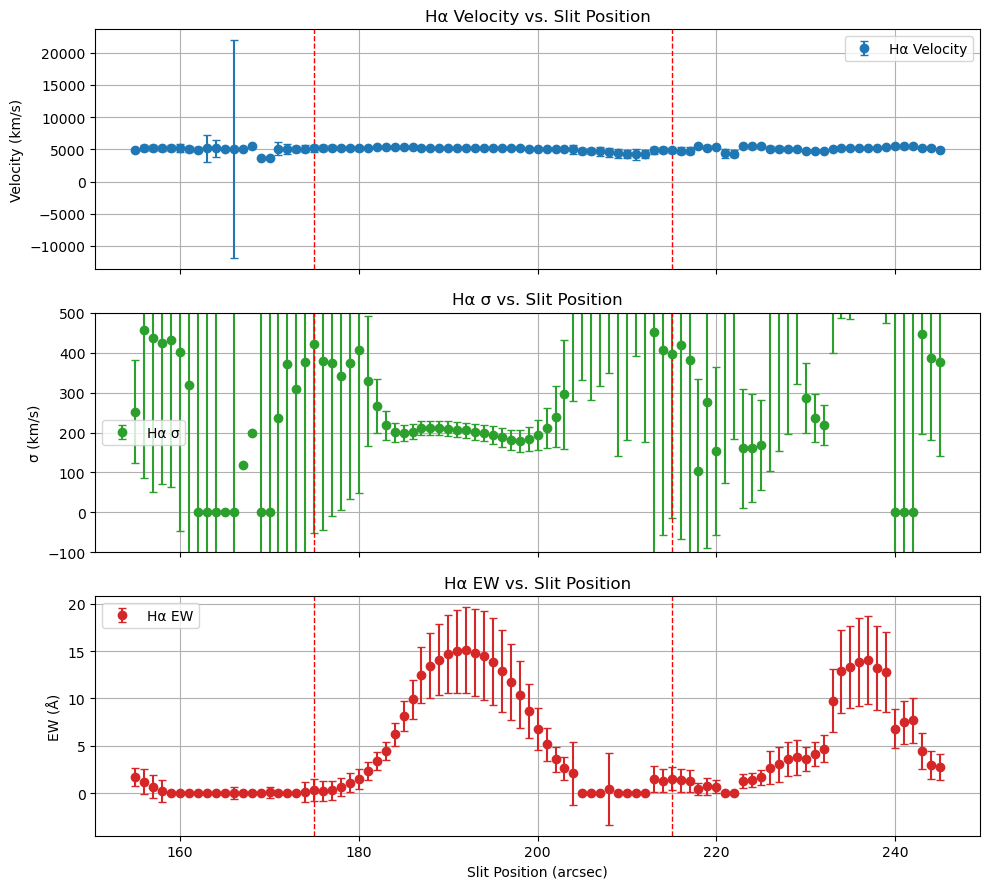

In [6]:
fig, axs = plt.subplots(3,1,figsize=(10,9),sharex=True)

colors = ['#1f77b4', '#2ca02c', '#d62728']  # blue, green, red


# Velocity
axs[0].errorbar(centers, velocities, yerr=v_errs,
                fmt='o', ecolor=colors[0], color=colors[0],
                capsize=3, label='Hα Velocity')
axs[0].set_ylabel("Velocity (km/s)")
axs[0].set_title("Hα Velocity vs. Slit Position")
axs[0].axvline(175, color='red', ls='--', lw=1)
axs[0].axvline(215, color='red', ls='--', lw=1)
axs[0].legend(); axs[0].grid(True)

# Dispersion
axs[1].errorbar(centers, dispersions, yerr=sigma_errs,
                fmt='o', ecolor=colors[1], color=colors[1],
                capsize=3, label='Hα σ')
axs[1].set_ylim(-100,500)
axs[1].set_ylabel("σ (km/s)")
axs[1].set_title("Hα σ vs. Slit Position")
axs[1].axvline(175, color='red', ls='--', lw=1)
axs[1].axvline(215, color='red', ls='--', lw=1)
axs[1].legend(); axs[1].grid(True)

# Equivalent Width
axs[2].errorbar(centers, EWs, yerr = EW_errs,
                fmt='o', ecolor=colors[2], color=colors[2],
                capsize=3, label='Hα EW')
axs[2].set_ylabel("EW (Å)")
axs[2].set_xlabel("Slit Position (arcsec)")
axs[2].set_title("Hα EW vs. Slit Position")
axs[2].axvline(175, color='red', ls='--', lw=1)
axs[2].axvline(215, color='red', ls='--', lw=1)
axs[2].legend(); axs[2].grid(True)

plt.tight_layout()
plt.show()


In [7]:
df = pd.DataFrame({
    'center':        centers,
    'velocity':      velocities,
    'velocity_err':  v_errs,
    'dispersion':    dispersions,
    'dispersion_err': sigma_errs,
    'EW':            EWs,
    'EW_err':        EW_errs
})

# Save to CSV
df.to_csv('../halpha_results_Z/SB1_halpha_results_Z.csv', index=False)
